In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import r2_score
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE, f_regression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, Isomap
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from catboost import CatBoostClassifier

VarianceThreshold selected features: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'volume'],
      dtype='object')
SelectKBest selected features: Index(['carat', 'x', 'y', 'z', 'volume'], dtype='object')


F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.012e+09, tolerance: 6.056e+07
  model = cd_fast.enet_coordinate_descent(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.573e+09, tolerance: 6.056e+07
  model = cd_fast.enet_coordinate_descent(
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.565e+09, toler

RFE selected features: Index(['carat', 'color', 'clarity', 'x', 'z'], dtype='object')
PCA explained variance ratio: [0.48094437 0.14903001]


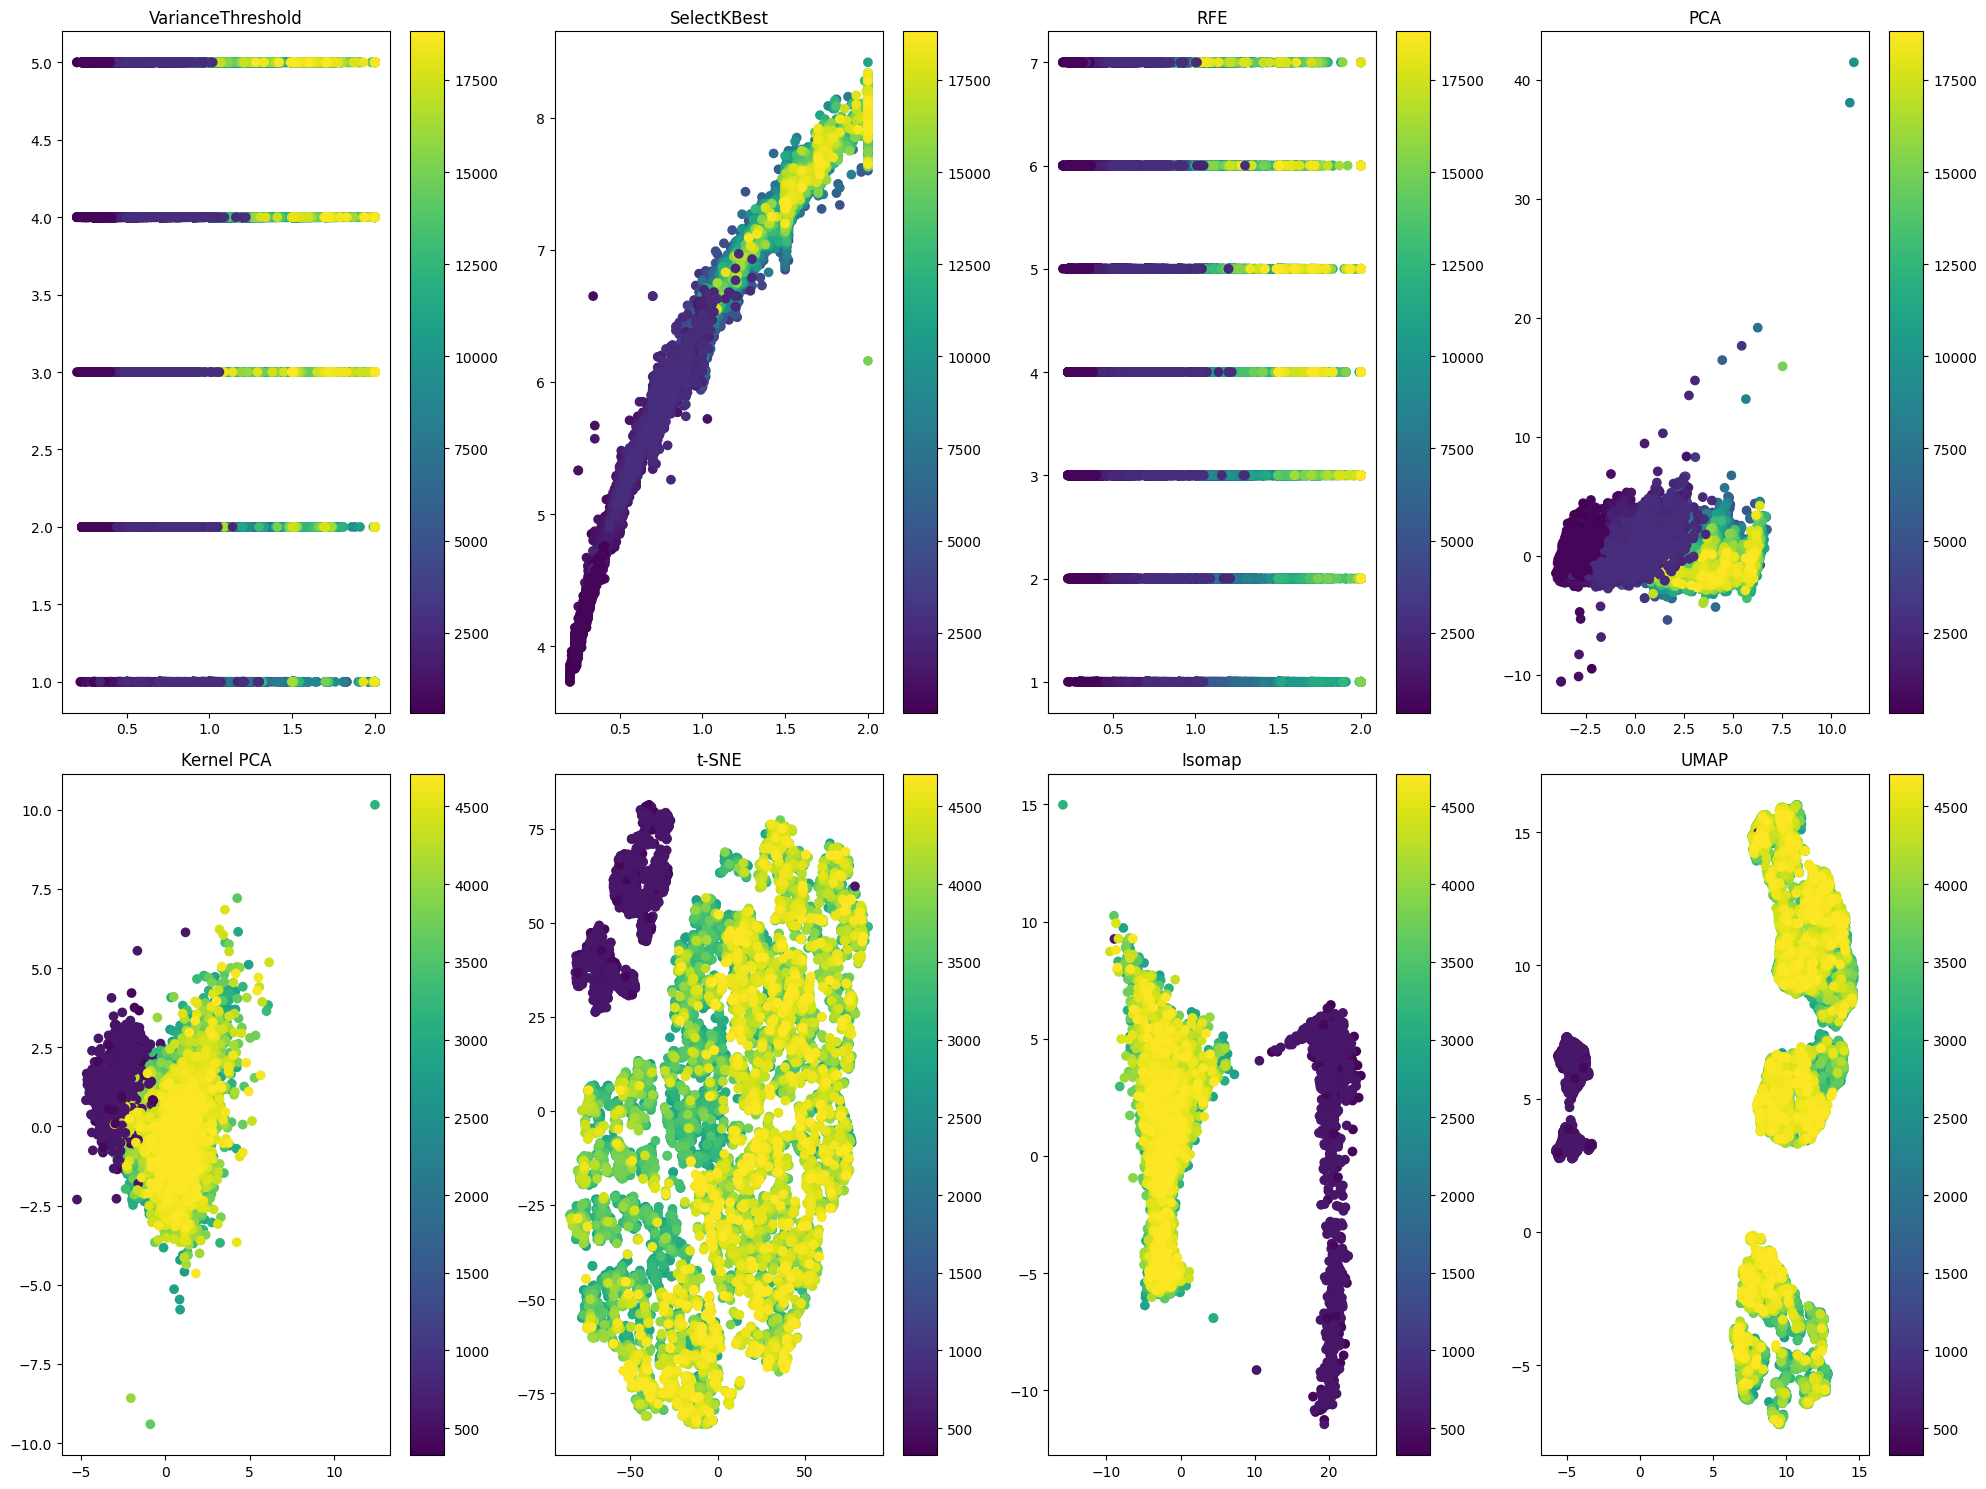

In [12]:
# Загрузка данных
data_reg = pd.read_csv('data_regression.csv')
x_reg = data_reg.drop(columns=['price'])
y_reg = data_reg['price']

# Масштабирование данных
scaler = StandardScaler()
x_reg_scaled = scaler.fit_transform(x_reg)

# Применение методов понижения размерности
# 1. VarianceThreshold
selector_vt = VarianceThreshold(threshold=0.1)
x_vt_reg = selector_vt.fit_transform(x_reg)
print("VarianceThreshold selected features:", x_reg.columns[selector_vt.get_support()])

# 2. SelectKBest
selector_skb = SelectKBest(score_func=f_regression, k=5)
x_skb_reg = selector_skb.fit_transform(x_reg, y_reg)
print("SelectKBest selected features:", x_reg.columns[selector_skb.get_support()])

# 3. RFE
estimator = Lasso()
selector_rfe = RFE(estimator, n_features_to_select=5)
x_rfe_reg = selector_rfe.fit_transform(x_reg, y_reg)
print("RFE selected features:", x_reg.columns[selector_rfe.get_support()])

# 4. PCA
pca = PCA(n_components=2)
x_pca_reg = pca.fit_transform(x_reg_scaled)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# 5. Kernel PCA
kpca = KernelPCA(n_components=5, 
                kernel='linear',    # Самый быстрый вариант
                eigen_solver='arpack',  # Для больших матриц
                n_jobs=-1)         # Параллельные вычисления
x_kpca_reg = kpca.fit_transform(x_reg_scaled[:10000])  # Обучаем на подвыборке
#x_kpca_reg = kpca.fit_transform(x_reg_scaled)  # Обучаем на подвыборке

# 6. t-SNE
tsne = TSNE(n_components=2, perplexity=30)
x_tsne_reg = tsne.fit_transform(x_reg_scaled[:10000])
#x_tsne_reg = tsne.fit_transform(x_reg_scaled)

# 7. Isomap
isomap = Isomap(n_components=2)
x_isomap_reg = isomap.fit_transform(x_reg_scaled[:10000])
#x_isomap_reg = isomap.fit_transform(x_reg_scaled)

# 8. UMAP
umap = UMAP(n_components=2)
x_umap_reg = umap.fit_transform(x_reg_scaled[:10000])
#x_umap_reg = umap.fit_transform(x_reg_scaled)

plt.figure(figsize=(20, 15))

# Методы отбора признаков (первые 3 графика)
plt.subplot(2, 4, 1)  # 2 строки, 4 столбца, позиция 1
plt.scatter(x_vt_reg[:, 0], x_vt_reg[:, 1], c=y_reg, cmap='viridis')
plt.title('VarianceThreshold')
plt.colorbar()

plt.subplot(2, 4, 2)  # позиция 2
plt.scatter(x_skb_reg[:, 0], x_skb_reg[:, 1], c=y_reg, cmap='viridis')
plt.title('SelectKBest')
plt.colorbar()

plt.subplot(2, 4, 3)  # позиция 3
plt.scatter(x_rfe_reg[:, 0], x_rfe_reg[:, 1], c=y_reg, cmap='viridis')
plt.title('RFE')
plt.colorbar()

plt.subplot(2, 4, 4)  # позиция 4
plt.scatter(x_pca_reg[:, 0], x_pca_reg[:, 1], c=y_reg, cmap='viridis')
plt.title('PCA')
plt.colorbar()

plt.subplot(2, 4, 5)  # позиция 5
plt.scatter(x_kpca_reg[:, 0], x_kpca_reg[:, 1], c=y_reg[:10000], cmap='viridis')
plt.title('Kernel PCA')
plt.colorbar()

plt.subplot(2, 4, 6)  # позиция 6
plt.scatter(x_tsne_reg[:, 0], x_tsne_reg[:, 1], c=y_reg[:10000], cmap='viridis')
plt.title('t-SNE')
plt.colorbar()

plt.subplot(2, 4, 7)  # позиция 7
plt.scatter(x_isomap_reg[:, 0], x_isomap_reg[:, 1], c=y_reg[:10000], cmap='viridis')
plt.title('Isomap')
plt.colorbar()

plt.subplot(2, 4, 8)  # позиция 8
plt.scatter(x_umap_reg[:, 0], x_umap_reg[:, 1], c=y_reg[:10000], cmap='viridis')
plt.title('UMAP')
plt.colorbar()

plt.tight_layout()
plt.show()

Unable to allocate 20.1 GiB for an array with shape (51904, 51904) and data type float64

VarianceThreshold selected features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'AgeGroup'],
      dtype='object')
SelectKBest selected features: Index(['cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')
RFE selected features: Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')
PCA explained variance ratio: [0.20306089 0.14002272]


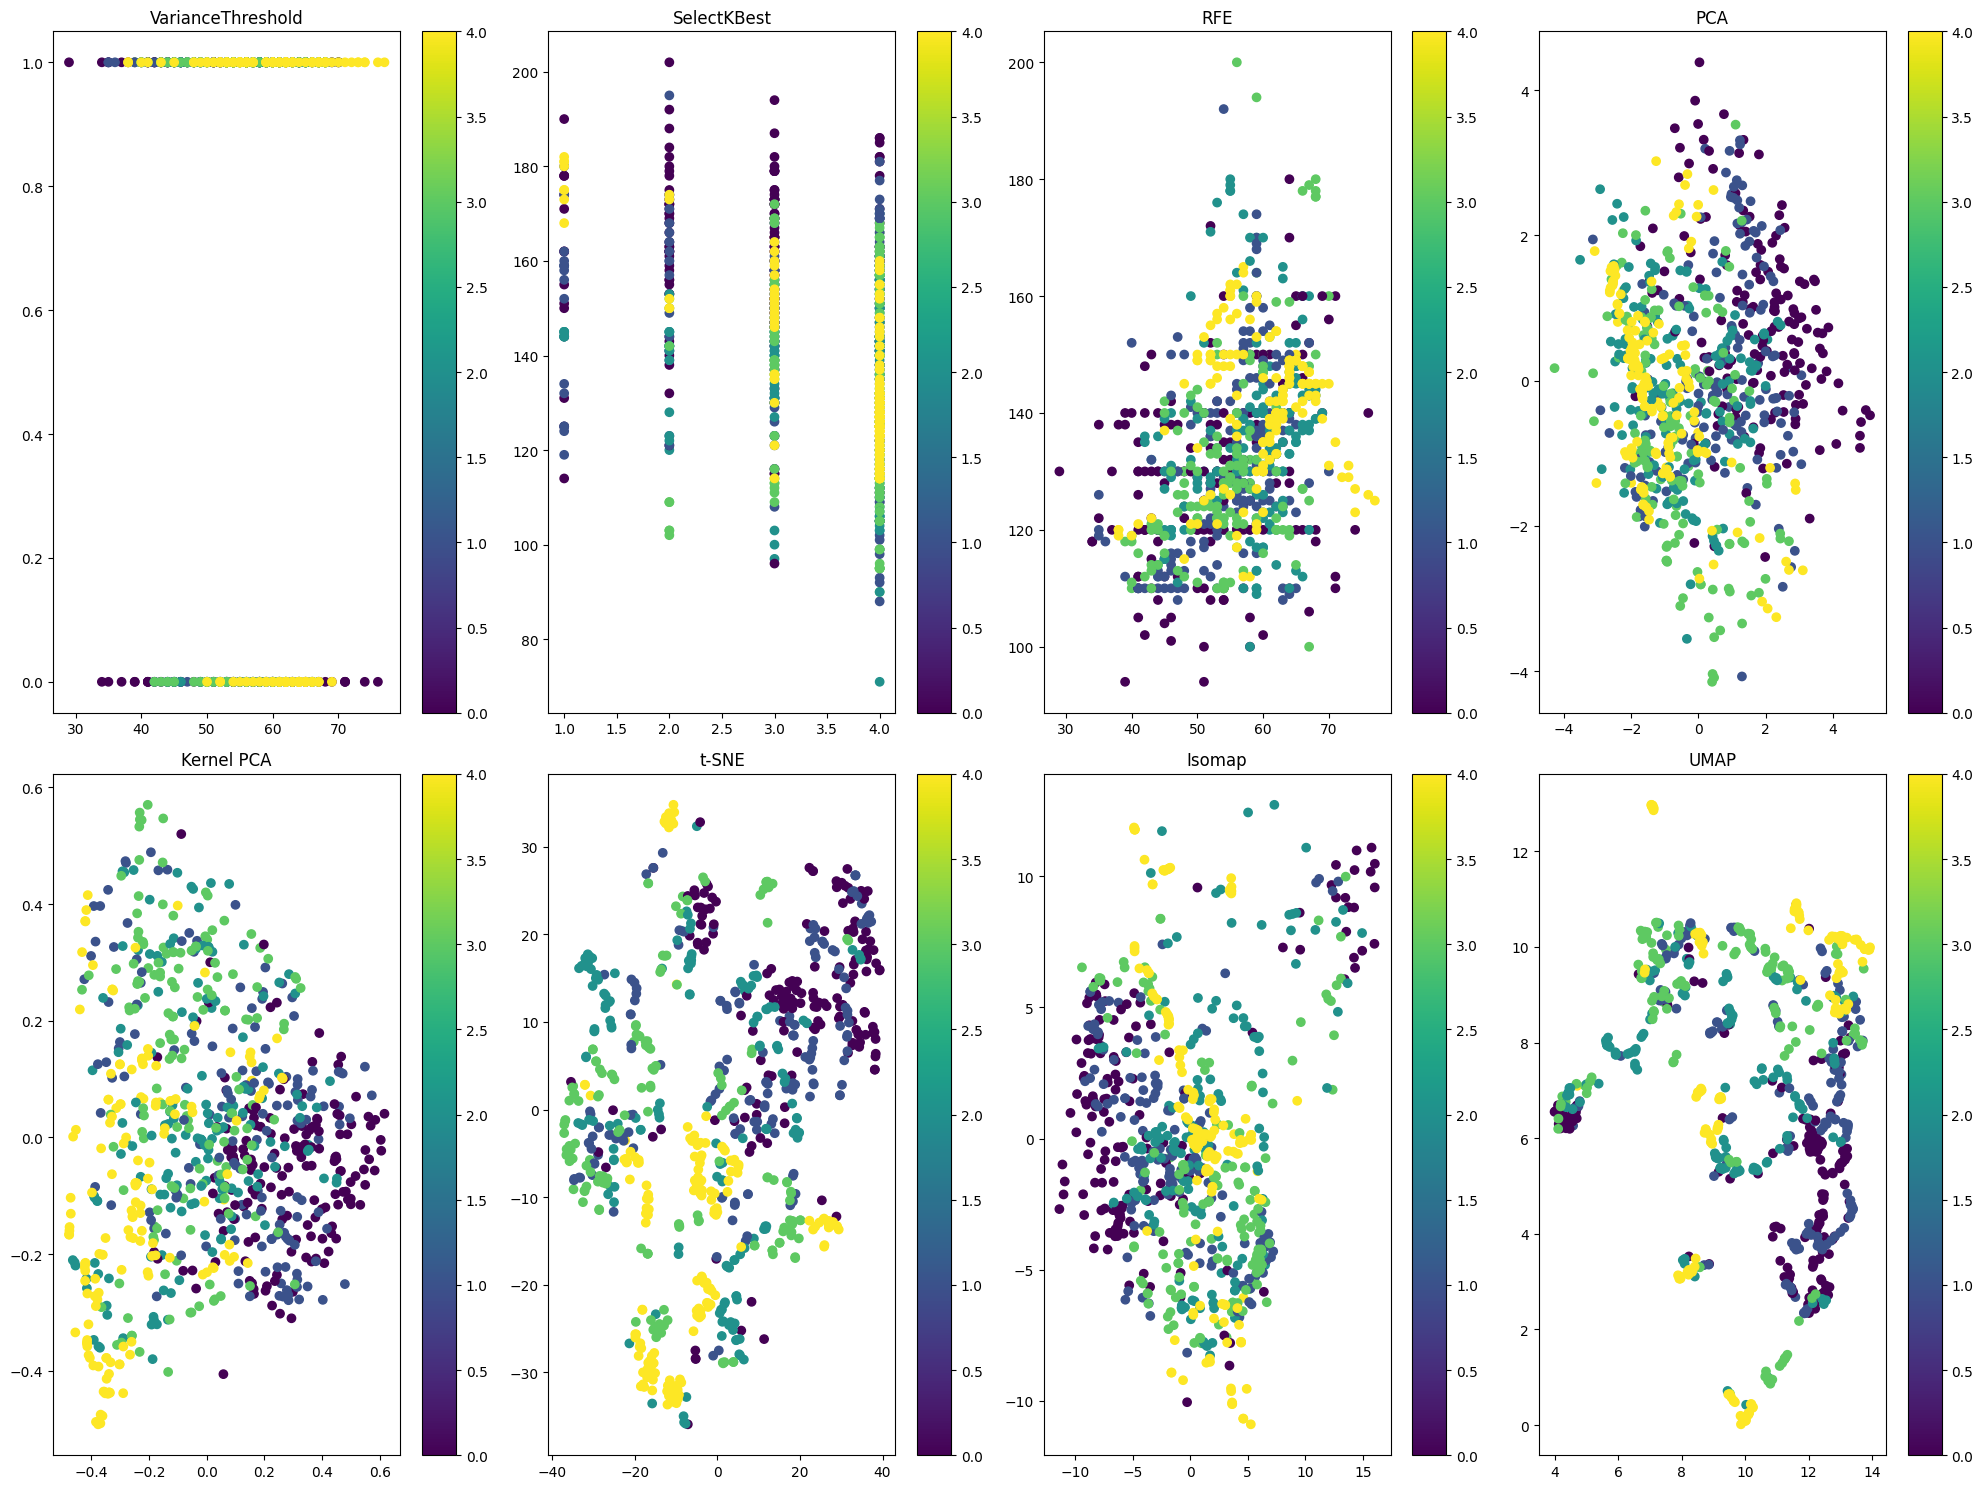

In [13]:
# Загрузка данных
data_clf = pd.read_csv('data_classification.csv')
x_clf = data_clf.drop(columns=['num'])
y_clf = data_clf['num']

# Балансировка данных
smote = SMOTE(random_state=42)
x_clf, y_clf = smote.fit_resample(x_clf, y_clf)

# Масштабирование данных
x_clf_scaled = scaler.fit_transform(x_clf)

# Применение методов понижения размерности
# 1. VarianceThreshold
selector_vt_clf = VarianceThreshold(threshold=0.1)
x_vt_clf = selector_vt_clf.fit_transform(x_clf)
print("VarianceThreshold selected features:", x_clf.columns[selector_vt_clf.get_support()])

# 2. SelectKBest
selector_skb_clf = SelectKBest(score_func=f_classif, k=5)
x_skb_clf = selector_skb_clf.fit_transform(x_clf, y_clf)
print("SelectKBest selected features:", x_clf.columns[selector_skb_clf.get_support()])

# 3. RFE
estimator_clf = CatBoostClassifier(verbose=0)
selector_rfe_clf = RFE(estimator_clf, n_features_to_select=5)
x_rfe_clf = selector_rfe_clf.fit_transform(x_clf, y_clf)
print("RFE selected features:", x_clf.columns[selector_rfe_clf.get_support()])

# 4. PCA
pca = PCA(n_components=2)
x_pca_clf = pca.fit_transform(x_clf_scaled)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# 5. Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
x_kpca_clf = kpca.fit_transform(x_clf_scaled)

# 6. t-SNE
tsne = TSNE(n_components=2, perplexity=30)
x_tsne_clf = tsne.fit_transform(x_clf_scaled)

# 7. Isomap
isomap = Isomap(n_components=2)
x_isomap_clf = isomap.fit_transform(x_clf_scaled)

# 8. UMAP
umap = UMAP(n_components=2)
x_umap_clf = umap.fit_transform(x_clf_scaled)

plt.figure(figsize=(20, 15))

# Методы отбора признаков (первые 3 графика)
plt.subplot(2, 4, 1)  # 2 строки, 4 столбца, позиция 1
plt.scatter(x_vt_clf[:, 0], x_vt_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('VarianceThreshold')
plt.colorbar()

plt.subplot(2, 4, 2)  # позиция 2
plt.scatter(x_skb_clf[:, 0], x_skb_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('SelectKBest')
plt.colorbar()

plt.subplot(2, 4, 3)  # позиция 3
plt.scatter(x_rfe_clf[:, 0], x_rfe_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('RFE')
plt.colorbar()

# Методы снижения размерности (остальные 5 графиков)
plt.subplot(2, 4, 4)  # позиция 4
plt.scatter(x_pca_clf[:, 0], x_pca_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('PCA')
plt.colorbar()

plt.subplot(2, 4, 5)  # позиция 5
plt.scatter(x_kpca_clf[:, 0], x_kpca_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('Kernel PCA')
plt.colorbar()

plt.subplot(2, 4, 6)  # позиция 6
plt.scatter(x_tsne_clf[:, 0], x_tsne_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('t-SNE')
plt.colorbar()

plt.subplot(2, 4, 7)  # позиция 7
plt.scatter(x_isomap_clf[:, 0], x_isomap_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('Isomap')
plt.colorbar()

plt.subplot(2, 4, 8)  # позиция 8
plt.scatter(x_umap_clf[:, 0], x_umap_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('UMAP')
plt.colorbar()

plt.tight_layout()
plt.show()

In [18]:
import joblib

# Разделение данных
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

# Загрузка модели
model_reg = joblib.load('RGR_Lasso.pkl')

# Обучение и оценка на разных методах понижения размерности
methods_reg = {
    'VarianceThreshold': x_vt_reg,
    'SelectKBest': x_skb_reg,
    'RFE': x_rfe_reg,
    'PCA': x_pca_reg,
    'Kernel PCA': x_kpca_reg,
    't-SNE': x_tsne_reg,
    'Isomap': x_isomap_reg,
    'UMAP': x_umap_reg
}

results_reg = {}
for name, x_reduced in methods_reg.items():
    if(name=='Kernel PCA' or name=='t-SNE' or name=='Isomap' or name=='UMAP'):
        x_train, x_test, y_train, y_test = train_test_split(x_reduced[:10000], y_reg[:10000], test_size=0.2, random_state=42)
        model_reg.fit(x_train[:10000], y_train[:10000])
        y_pred = model_reg.predict(x_test[:10000])
        mse = mean_squared_error(y_test[:10000], y_pred)
        r2 = r2_score(y_test[:10000], y_pred[:10000])
        results_reg[name] = {'MSE': mse, 'R2': r2}
    else: 
        x_train, x_test, y_train, y_test = train_test_split(x_reduced, y_reg, test_size=0.2, random_state=42)
        model_reg.fit(x_train, y_train)
        y_pred = model_reg.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results_reg[name] = {'MSE': mse, 'R2': r2}

In [19]:
# Разделение данных
x_train_clf, x_test_clf, y_train_clf, y_test_clf = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Загрузка модели
model_clf = CatBoostClassifier()
model_clf.load_model('RGR_CatBoost.cbm')

# Обучение и оценка на разных методах понижения размерности
methods_clf = {
    'VarianceThreshold': x_vt_clf,
    'SelectKBest': x_skb_clf,
    'RFE': x_rfe_clf,
    'PCA': x_pca_clf,
    'Kernel PCA': x_kpca_clf,
    't-SNE': x_tsne_clf,
    'Isomap': x_isomap_clf,
    'UMAP': x_umap_clf
}

results_clf = {}
for name, x_reduced in methods_clf.items():
    x_train, x_test, y_train, y_test = train_test_split(x_reduced, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
    model_clf.fit(x_train, y_train)
    y_pred = model_clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_clf[name] = {'Accuracy': acc, 'F1': f1}

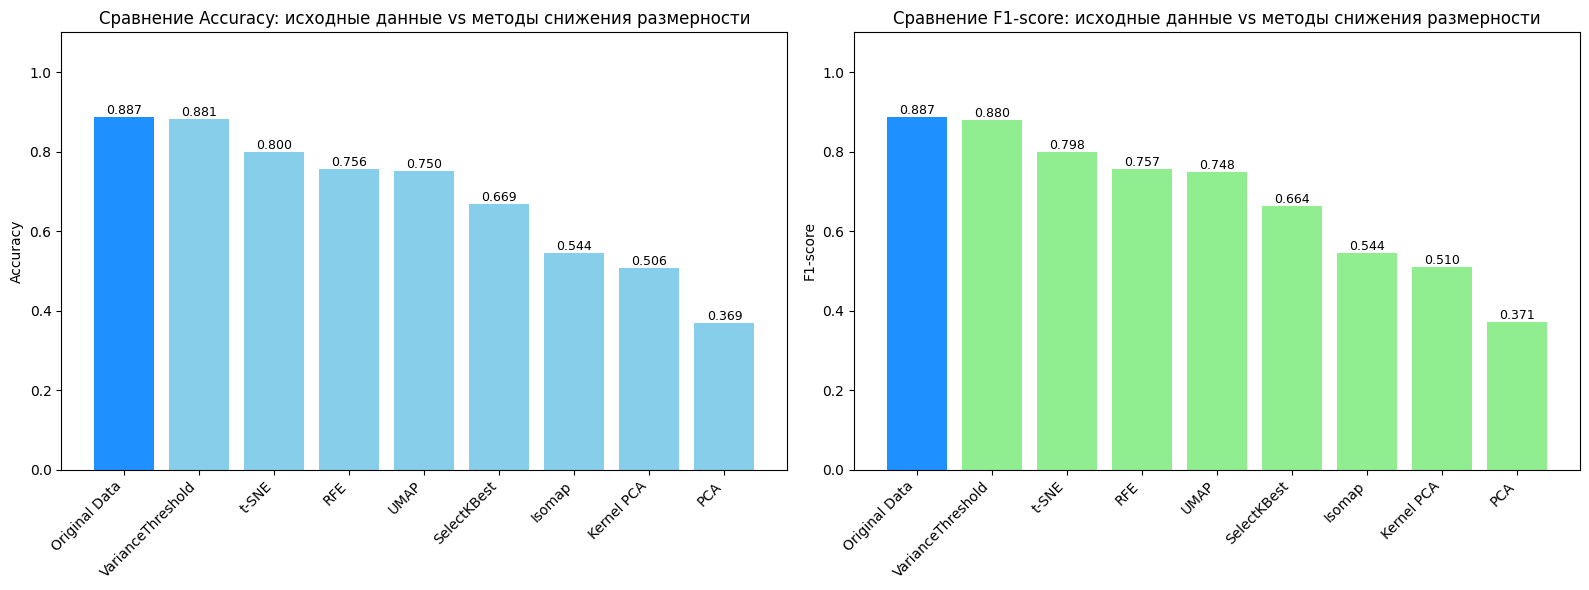

In [20]:
# Добавляем результаты для исходных данных (без снижения размерности)
x_train, x_test, y_train, y_test = train_test_split(x_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)
model_clf.fit(x_train, y_train)
y_pred = model_clf.predict(x_test)
baseline_acc = accuracy_score(y_test, y_pred)
baseline_f1 = f1_score(y_test, y_pred, average='weighted')

# Создаем DataFrame с результатами
df_results = pd.DataFrame.from_dict(results_clf, orient='index')

# Добавляем строку с исходными данными
df_results.loc['Original Data'] = {'Accuracy': baseline_acc, 'F1': baseline_f1}

# Сортируем методы по Accuracy (кроме исходных данных - они всегда первые)
sorted_methods = ['Original Data'] + df_results.drop('Original Data').sort_values('Accuracy', ascending=False).index.tolist()
df_results = df_results.loc[sorted_methods]

# Визуализация
plt.figure(figsize=(16, 6))

# График Accuracy
plt.subplot(1, 2, 1)
colors = ['dodgerblue'] + ['skyblue']*(len(df_results)-1)  # Первый столбец - синий
bars_acc = plt.bar(df_results.index, df_results['Accuracy'], color=colors)
plt.title('Сравнение Accuracy: исходные данные vs методы снижения размерности')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # Accuracy имеет диапазон 0-1
plt.xticks(rotation=45, ha='right')

# Добавляем значения и стрелки сравнения
for i, bar in enumerate(bars_acc):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)


# График F1-score
plt.subplot(1, 2, 2)
colors = ['dodgerblue'] + ['lightgreen']*(len(df_results)-1)  # Первый столбец - синий
bars_f1 = plt.bar(df_results.index, df_results['F1'], color=colors)
plt.title('Сравнение F1-score: исходные данные vs методы снижения размерности')
plt.ylabel('F1-score')
plt.ylim(0, 1.1)  # F1-score имеет диапазон 0-1
plt.xticks(rotation=45, ha='right')

# Добавляем значения и стрелки сравнения
for i, bar in enumerate(bars_f1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

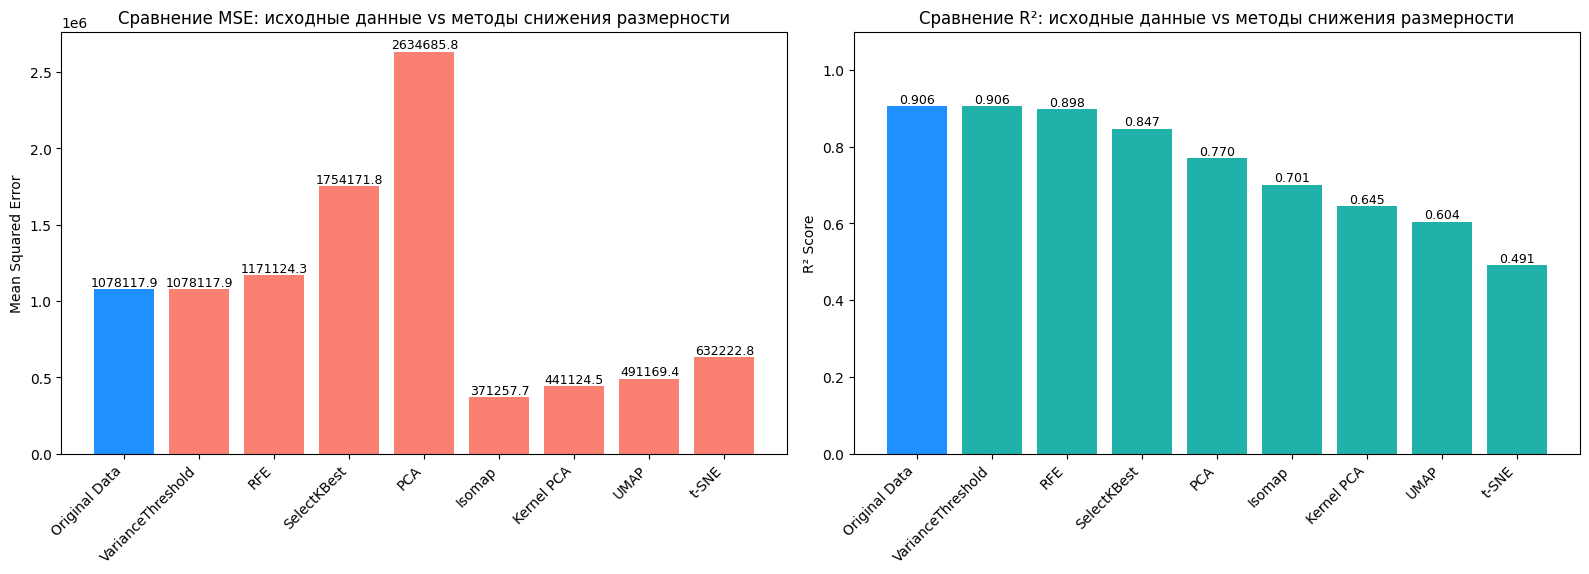

In [21]:
# Добавляем результаты для исходных данных (без снижения размерности)
x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)
model_reg.fit(x_train, y_train)
y_pred = model_reg.predict(x_test)
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_r2 = r2_score(y_test, y_pred)

# Создаем DataFrame с результатами
df_results_reg = pd.DataFrame.from_dict(results_reg, orient='index')

# Добавляем строку с исходными данными
df_results_reg.loc['Original Data'] = {'MSE': baseline_mse, 'R2': baseline_r2}

# Сортируем методы по R2 (кроме исходных данных - они всегда первые)
sorted_methods = ['Original Data'] + df_results_reg.drop('Original Data').sort_values('R2', ascending=False).index.tolist()
df_results_reg = df_results_reg.loc[sorted_methods]

# Визуализация
plt.figure(figsize=(16, 6))

# График MSE
plt.subplot(1, 2, 1)
colors = ['dodgerblue'] + ['salmon']*(len(df_results_reg)-1)  # Первый столбец - синий
bars_mse = plt.bar(df_results_reg.index, df_results_reg['MSE'], color=colors)
plt.title('Сравнение MSE: исходные данные vs методы снижения размерности')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')

# Добавляем значения
for bar in bars_mse:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize=9)

# График R2
plt.subplot(1, 2, 2)
colors = ['dodgerblue'] + ['lightseagreen']*(len(df_results_reg)-1)  # Первый столбец - синий
bars_r2 = plt.bar(df_results_reg.index, df_results_reg['R2'], color=colors)
plt.title('Сравнение R²: исходные данные vs методы снижения размерности')
plt.ylabel('R² Score')
plt.ylim(0, 1.1)  # Добавляем немного места для текста
plt.xticks(rotation=45, ha='right')

# Добавляем значения и стрелки сравнения
for i, bar in enumerate(bars_r2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()

In [23]:
# Создаем и выводим DataFrame с результатами классификации
df_results_clf = pd.DataFrame.from_dict(results_clf, orient='index')
df_results_clf.loc['Original Data'] = {'Accuracy': baseline_acc, 'F1': baseline_f1}
df_results_clf = df_results_clf.loc[['Original Data'] + df_results_clf.drop('Original Data').sort_values('Accuracy', ascending=False).index.tolist()]

print("Результаты классификации:")
display(df_results_clf.style
        .format({'Accuracy': '{:.3f}', 'F1': '{:.3f}'})
        .background_gradient(subset=['Accuracy'], cmap='Blues')
        .background_gradient(subset=['F1'], cmap='Greens'))
# Создаем и выводим DataFrame с результатами регрессии
df_results_reg = pd.DataFrame.from_dict(results_reg, orient='index')
df_results_reg.loc['Original Data'] = {'MSE': baseline_mse, 'R2': baseline_r2}
df_results_reg = df_results_reg.loc[['Original Data'] + df_results_reg.drop('Original Data').sort_values('R2', ascending=False).index.tolist()]

print("\nРезультаты регрессии:")
display(df_results_reg.style
        .format({'MSE': '{:.1f}', 'R2': '{:.3f}'})
        .background_gradient(subset=['MSE'], cmap='Reds_r')  # Обратный градиент для MSE (чем меньше - лучше)
        .background_gradient(subset=['R2'], cmap='Greens'))

Результаты классификации:


,Accuracy,F1
Original Data,0.887,0.887
VarianceThreshold,0.881,0.880
t-SNE,0.800,0.798
RFE,0.756,0.757
UMAP,0.750,0.748
SelectKBest,0.669,0.664
Isomap,0.544,0.544
Kernel PCA,0.506,0.510
PCA,0.369,0.371



Результаты регрессии:


,MSE,R2
Original Data,1078117.9,0.906
VarianceThreshold,1078117.9,0.906
RFE,1171124.3,0.898
SelectKBest,1754171.8,0.847
PCA,2634685.8,0.770
Isomap,371257.7,0.701
Kernel PCA,441124.5,0.645
UMAP,491169.4,0.604
t-SNE,632222.8,0.491


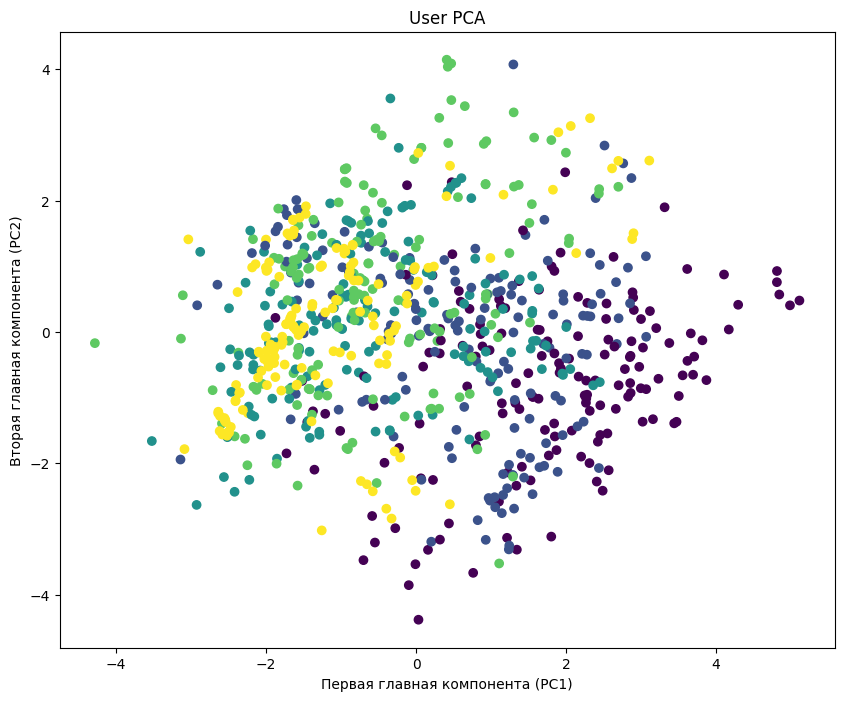

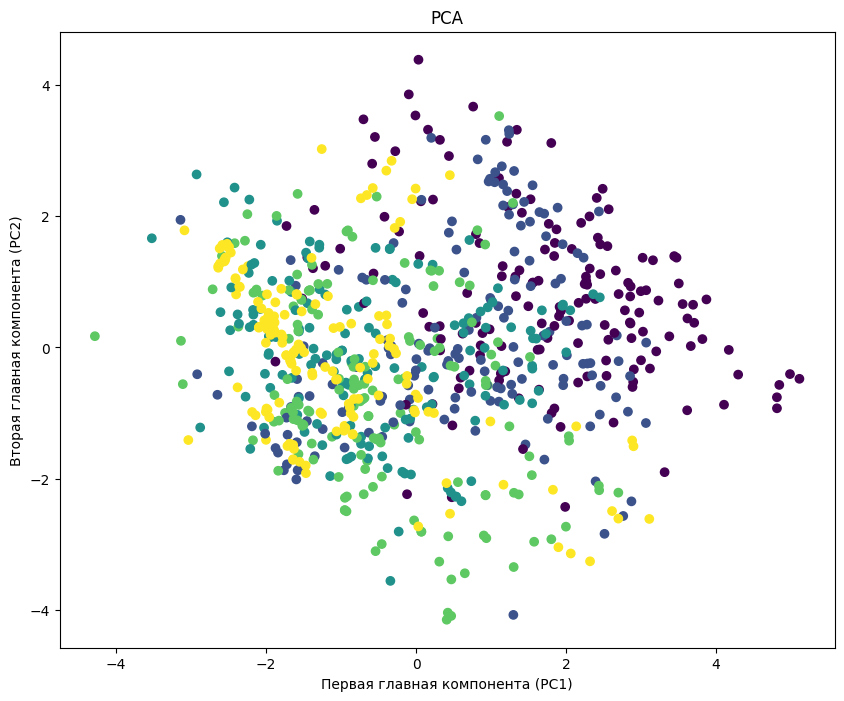

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # 1. Стандартизация данных
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # 2. Вычисление ковариационной матрицы
        cov_matrix = np.cov(X_centered, rowvar=False)
        
        # 3. Вычисление собственных значений и векторов
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # 4. Сортировка собственных векторов по убыванию собственных значений
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # 5. Выбор первых n_components компонент
        self.components = eigenvectors[:, :self.n_components]
    
    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

# Загрузка данных (предполагаем, что x_clf уже загружен и не содержит метки класса)
X = x_clf.values if isinstance(x_clf, pd.DataFrame) else x_clf

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_clf, cmap='viridis')
plt.title('User PCA')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.show()

# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(x_pca_clf[:, 0], x_pca_clf[:, 1], c=y_clf, cmap='viridis')
plt.title('PCA')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.show()

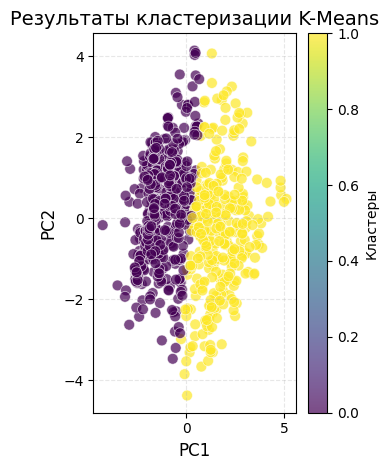


Интерпретация кластеров:
------------------------
Кластер 0: 468 объектов (58.5% данных)
Кластер 1: 332 объектов (41.5% данных)

Соответствие кластеров истинным классам:


col_0,0,1,2,3,4
row_0,,,,,
0,22,60,121,120,145
1,138,100,39,40,15



Характеристики кластера 0:
Средние значения признаков:
chol        243.019231
trestbps    137.365385
thalach     129.980769
age          58.861111
thal          5.882479
dtype: float64

Характеристики кластера 1:
Средние значения признаков:
chol        241.530120
thalach     156.876506
trestbps    128.424699
age          51.737952
thal          4.521084
dtype: float64


In [44]:
from kmeans import CustomKMeans

kmeans = CustomKMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

plt.subplot(1, 2, 2)

scatter_clusters = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', 
                              alpha=0.7, edgecolors='w', linewidth=0.5, s=60)
plt.title('Результаты кластеризации K-Means', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(scatter_clusters, label='Кластеры')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Интерпретация кластеров
print("\nИнтерпретация кластеров:")
print("------------------------")

# 5.1. Размеры кластеров
cluster_sizes = np.bincount(clusters)
for i, size in enumerate(cluster_sizes):
    print(f"Кластер {i}: {size} объектов ({size/len(clusters):.1%} данных)")

# 5.2. Сравнение с истинными классами
print("\nСоответствие кластеров истинным классам:")
cluster_class_dist = pd.crosstab(clusters, y)
display(cluster_class_dist.style.background_gradient(cmap='Blues'))

# 5.3. Характеристики кластеров в исходном пространстве
original_features = x_clf.columns
for i in range(kmeans.n_clusters):
    cluster_data = X[clusters == i]
    print(f"\nХарактеристики кластера {i}:")
    print("Средние значения признаков:")
    print(pd.Series(cluster_data.mean(axis=0), index=original_features).sort_values(ascending=False)[:5])